In [1]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=d73cfdc8be9ada22a3d0486cf9157e61c4e8762a8ca6caa4a22d3e52e952eb05
  Stored in directory: /Users/sindhugunaseharan/Library/Caches/pip/wheels/4c/a4/ce/ad31f7d9f6bfce32741955de12e76e3a6e7181c20321db3c66
Successfully built pandasql
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 574.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [284]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
from pandasql import sqldf
import pandasql as ps
import seaborn
mysql = lambda q: sqldf(q, globals())
import re
from wordcloud import WordCloud
from collections import Counter

In [155]:
#Reading the Dataset
xls = pd.ExcelFile("HospitalDatabase.xlsx")

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')

#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

#Reading the EDUnique sheet
df_E = pd.read_excel(xls, 'EDUnique')

## Question 31. If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [59]:
#df_PA

In [125]:
#df_PA[df_PA['Gender'] == 'Male']

In [97]:
#Add a new column call Fullname and concatenate the name with the respective prefix
df_PA.loc[df_PA['Gender'] == 'Male','Fullname'] = 'Mr'+' '+ df_PA['FirstName'] +' '+ df_PA['LastName']
df_PA.loc[df_PA['Gender'] == 'Female','Fullname'] = 'Ms'+' '+ df_PA['FirstName'] +' '+ df_PA['LastName']
df_PA

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Fullname
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,Mr Lanni Sue
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,Mr Far Myers
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,Mr Devlin Michael
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,Mr Carmine Texas
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,Mr Tann Bama
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,Mr Wat Fideler
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,Mr Wandie Baythrop
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,Mr Diahann Smeeton
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,Mr Panchito Sharple


In [57]:
#df_PA[df_PA['Gender'] == 'Female']

## Question 32: Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.


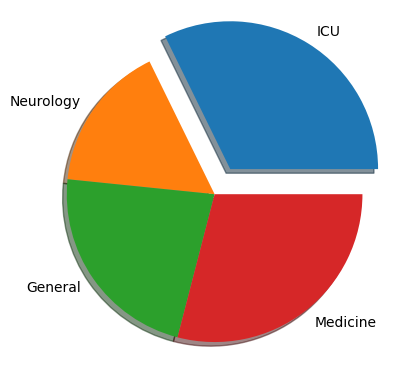

In [48]:
#Pie Chart with Services and explode the highest LOS
y = np.array([10,5,7,9])
myexplode=[0.2,0,0,0]
mylabels=["ICU", "Neurology", "General", "Medicine"]
#mycolors=["red","black","green","#4CAF50"]
plt.pie(y, labels=mylabels, explode=myexplode, shadow= True)
plt.show()

## Question 33: Plot a graph to show the distribution of expected length of stay.

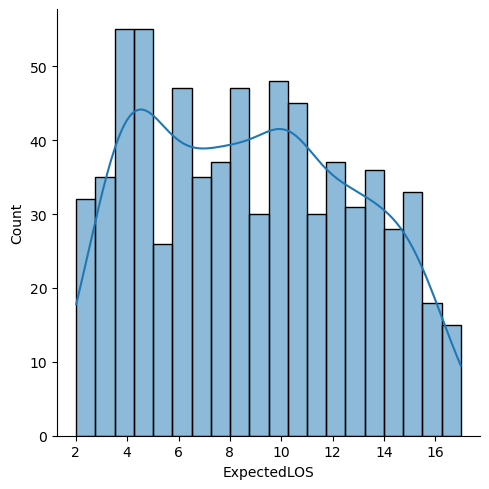

In [55]:
#Distribution Chart
sns.displot(df_D["ExpectedLOS"], kde="True", bins=20)
plt.show()

## Q34: Create a WordCloud Chart with Reason For Visit.

<class 'str'>


(-0.5, 599.5, 399.5, -0.5)

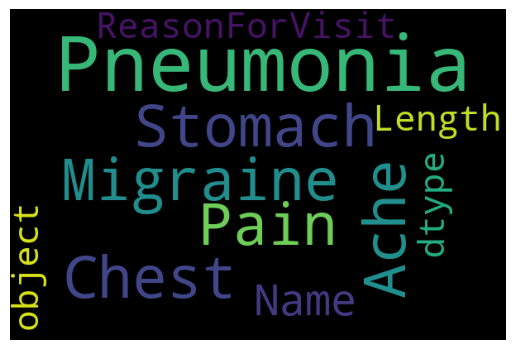

In [153]:
data1 = df_E['ReasonForVisit']
data1 =str(data1)
print (type(data1) )
# Creating wordcloud chart
wordcloud = WordCloud(colormap=None, width=600, height=400).generate(data1)
plt.imshow(wordcloud)
plt.axis('off')

## Q35: np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.

In [3]:
arr =np.arange(1,31)
newarr =arr.reshape(6,5)
sarr =(newarr[0:1 , 3:5])
sarr1 =(newarr[4:6 , 3:5])
sarr = np.where(sarr <6,-1, 99)
sarr1 = np.where(sarr1 <6,-1, 99)
print (sarr)
print (sarr1)

[[-1 -1]]
[[99 99]
 [99 99]]


## Q36. Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [90]:
Patient_count = df_AV.loc[(df_AV['BloodPressureSystolic'] > 180 ) & (df_AV['BloodPressureDiastolic'] > 120)]
print('Count of Patients:',Patient_count['PatientMRN'].count())

Count of Patients: 101


## Q57. Find reasonForVisit with highest count of acuity 5 patients.

In [255]:
Rfv = df_E[df_E['Acuity'] == 5].groupby(['ReasonForVisit'])['PatientID'].count() # Total 186 from ED Visits Sheet
print(Rfv)

ReasonForVisit
Accident               37
Car Accident           15
Chest Pain             53
Fever                  15
Gun Shot               16
Pneumonia              13
Shortness of Breath    37
Name: PatientID, dtype: int64


## Q58. Display full name of patients who are born in 1986

In [393]:
Fname= df_PA.loc[(df_PA['DateOfBirth'].dt.year) == 1986]
print(Fname.FirstName+' '+Fname.LastName)

23         Gabriel  Joseph
24         Lincoln  Brenda
29             Ala Halpert
72            Lolita Darci
164         Fadel Bernardt
238         Bentley Kippax
367            Vale Olanda
373          Britt Dureden
386       Cristabel Chatel
415       Constantia Group
452       Morgan Scrowston
561             Dom Baglow
568        Ignazio Melling
595         Homenick Rings
639           Hashim Slark
643       Ellie Ramsbotham
674        Llewellyn Group
714             Niles Shaw
733             Yvette Inc
777          Siouxie Group
852            Carly Group
868        Worth Pickering
877           Arni Baldack
909       Kuvalis Coupland
922    Rebbecca Rollingson
940            Wat Fideler
dtype: object


## Q23: Add column 'Age' in Patient table.

In [120]:
Age = datetime.today().year - df_PA['DateOfBirth'].dt.year
df_PA['Age'] = Age
df_PA

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Fullname,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,Mr Lanni Sue,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,Mr Far Myers,38
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,Mr Devlin Michael,47
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,Mr Carmine Texas,55
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,Mr Tann Bama,61
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,Mr Wat Fideler,37
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,Mr Wandie Baythrop,53
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,Mr Diahann Smeeton,40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,Mr Panchito Sharple,60


## Q24: Using arrays and loops, find the count of patients based on gender.

In [154]:
test = df_PA[df_PA['Gender'] == 'Male']     #Still need to work on this
#t1 = np.array[test]#.size
test['Gender'].count() # returns the count 537
#x = len(test) # returns the count 537 with array function len()
#print(x)
#for x in range(test):
#    print(x)


537

## Q30.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [163]:
P_details = df_P.loc[(df_P['ProviderID'] > 10) & (df_P['ProviderID'] < 21) & (df_P['ProviderSpecialty'] == 'Surgery')]
print(P_details)

    ProviderID     ProviderName ProviderSpecialty     ProviderDateOnStaff
10          11     Kim Kimberly           Surgery 1998-05-10 14:47:29.468
11          12         Sarah Ab           Surgery 1998-08-18 05:22:40.762
12          13  Abigail Marriot           Surgery 1998-11-08 12:25:45.705
13          14          Dave Yu           Surgery 1999-06-26 16:18:57.436
14          15  Christian Saint           Surgery 2000-08-27 00:12:40.326
15          16     Perry Pardon           Surgery 2001-02-13 11:49:17.862


## Q38.Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [418]:
#Using Pandas Loc to Index with Slices
#a = df_PA.loc[101:200]
loc_indices = df_PA.loc[101:200, ['FirstName','LastName']]
loc_indices

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


## Q26:Plot a graph to show the distribution of expected mortality.

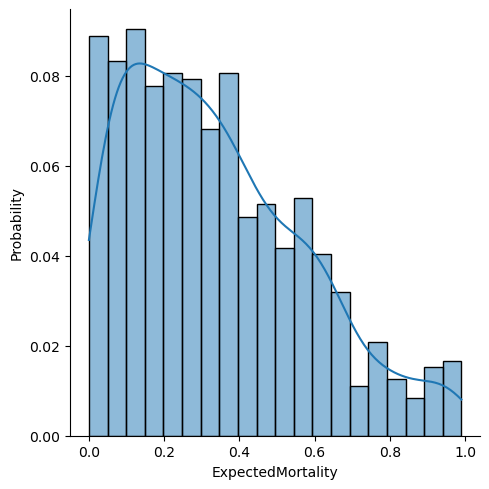

In [210]:
#kde is Kernel Density Estimation plot
#sns.displot(df_RE['ExpectedMortality'], kde=True, bins=20)
#plt.show()
sns.displot(df_D['ExpectedMortality'], stat = 'probability', kde = True, bins = 20)
plt.show()

## Q40.Create a jointplot on expected mortality & expected length of stay.

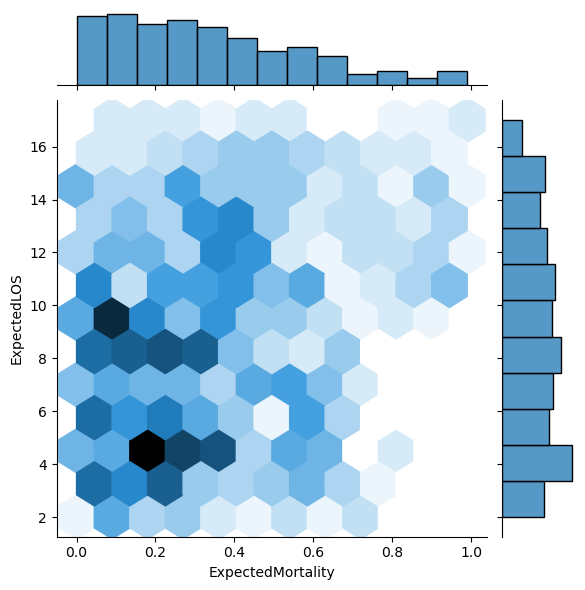

In [225]:
#ExpectedLOS, ExpectedMortality from Discharges Sheet
sns.jointplot(data = df_D, x = 'ExpectedMortality',y = 'ExpectedLOS',kind = 'hex')
#height=6, ratio=5, space=0.2, kind = 'scatter')#,color='blue')
plt.show()

## Q28.Find the visit type with maximum 'No Show'.

In [423]:
#Top value of the sorted list is displayed
V_Type = df_AV[df_AV['VisitStatus'] == 'No Show'].groupby(['VisitType'])['PatientMRN'].count().sort_values(ascending=False) 
print(V_Type.head(1))

VisitType
Telemedicine    74
Name: PatientMRN, dtype: int64


## Q27.Which departmentID has maximum number of visits scheduled.

In [287]:
#from collections import Counter -- included in the top
lst = df_AV['VisitDepartmentID']
cnt = Counter(lst)
maximums = [x for x in cnt if cnt[x] == cnt.most_common(1)[0][1]]
print('departmentID with maximum number of visits:',maximums)

departmentID with maximum number of visits: [11]


## Q37.Display the data where actual LOS is greater than expected LOS.

In [414]:
#Calculate the Actual Length Of Stay
ActualLOS = df_D['DischargeDate'] - df_D['AdmissionDate']

#Converting the datetime stamp to float in days
df_D['ActualLOS']= ActualLOS/np.timedelta64(1, 'D')

Data_diff = df_D[df_D['ActualLOS'] > df_D['ExpectedLOS']]
Data_diff

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ActualLOS
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12.124360
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8.564307
5,395,109,2018-01-07,2018-01-22 17:57:37.103,Expired,Cardiology,Flu,2.981758,0.192976,15.748346
6,396,115,2018-01-08,2018-01-17 02:19:05.623,Expired,Cardiology,Flu,4.959098,0.254923,9.096593
7,259,116,2018-01-08,2018-01-20 03:40:53.605,Expired,Cardiology,Broken Leg,2.279624,0.491274,12.153398
...,...,...,...,...,...,...,...,...,...,...
712,703,703,2018-02-21,2018-02-27 08:53:38.211,Transfer,General Medicine,Pneumonia,3.539165,0.275691,6.370581
713,709,708,2018-02-21,2018-03-01 05:59:22.116,Transfer,General Medicine,Diabetes,4.518876,0.455570,8.249562
714,697,713,2018-02-21,2018-03-04 00:23:19.967,Transfer,General Medicine,Pneumonia,8.542970,0.201036,11.016203
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13.146589


## Q29.Which demographic patients are prone to get stroke?

In [403]:
#Extracting only 2 fields based on 'PrimaryDiagnosis'
df_RE_new = df_RE.loc[df_RE['PrimaryDiagnosis'] == 'Stroke', 'PatientID']

#Merging based on PatientID
merge_df_pd = pd.merge(df_PA, df_RE_new, on="PatientID") 

#Grouping based on Race
p_stroke = merge_df_pd.groupby(['Race'])['PatientID'].count().sort_values(ascending=False)
print(p_stroke.head(1))

Race
Black/African-American    40
Name: PatientID, dtype: int64


## Q25.Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'. Create a new column to show your analysis.

In [470]:
#Creating bins
SBP_based = [120,130,140,180,190]

#Giving labels for the created bins
label_SBP = ["Mild Hypertension", "Moderate Hypertension", "High Hypertension", "Severe Hypertension"]

#Creating new column in the Dataframe
df_AV['Analysis'] = pd.cut(df_AV['BloodPressureSystolic'], bins = SBP_based, labels =  label_SBP)

#Creating a new Dataframe with a selected columns
df_AV_new_Hyp = df_AV[['VisitID','PatientMRN','BloodPressureSystolic','Analysis']].copy()
df_AV_new_Hyp


,VisitID,PatientMRN,BloodPressureSystolic,Analysis
0,202,840,188.0,Severe Hypertension
1,436,820,179.0,High Hypertension
2,794,879,133.0,Moderate Hypertension
3,799,884,132.0,Moderate Hypertension
4,515,32,131.0,Moderate Hypertension
...,...,...,...,...
945,788,873,187.0,Severe Hypertension
946,703,855,182.0,Severe Hypertension
947,481,865,150.0,High Hypertension
948,398,635,177.0,High Hypertension


## Q39. Delete the column 'DischargeDispostion' iteratively.

In [474]:
#DischargeDisposition
df_RE_withNoDD = df_RE.drop(columns=["DischargeDisposition"], axis=1)
df_RE_withNoDD

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


## Q22.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [478]:
#Finding Avg LOS
df_D['Average_LOS'] = (df_D['DischargeDate'] - df_D['AdmissionDate']) / np.timedelta64(1, 'D')
pivot1 = df_D.pivot_table(index=['Service', 'DischargeDisposition'], values=['Average_LOS'], aggfunc='mean')
pivot1

Average_LOS
Service          DischargeDisposition             
Cardiology       Expired                  9.357828
                 Home                    10.633869
                 Transfer                11.759865
General Medicine Expired                  8.972359
                 Home                    10.298306
                 Transfer                11.075935
Hospitalist      Expired                 10.587996
                 Home                     9.522124
                 Transfer                 9.248801
ICU              Expired                  9.790686
                 Home                     9.575618
                 Transfer                 9.479894
Neurology        Expired                 10.650761
                 Home                     9.677446
                 Transfer                12.261288
Orthopeadics     Expired                 12.327644
                 Home                     9.325017
                 Transfer                16.559908

## Q21.Which reason of visit has maximum mortality rate.

In [499]:
#Merge EDVisits with the ReAdmissionRegistry
merge_df_mmr = pd.merge(df_E, df_RE, on="PatientID") 
merge_df_mmr

#pivot table in the merge table
pivot_max = merge_df_mmr.pivot_table(index=['ReasonForVisit'], values = ['ExpectedMortality'], aggfunc='mean')

#Get the highest top value 
pivot_max.sort_values(by=['ExpectedMortality'], ascending=False).head(1)


,ExpectedMortality
ReasonForVisit,
Gun Shot,0.376451


## Q24.Using arrays and loops, find the count of patients based on gender.

In [534]:
# Create an empty dictionary to store the gender counts
gender_counts = {}
for index, row in enumerate(df_PA.itertuples(), 1):
    gender = getattr(row, 'Gender')  # Get the gender value from the row
    # Check if gender is already in the dictionary, and update the count
    if gender in gender_counts:
        gender_counts[gender] += 1
    else:
        gender_counts[gender] = 1
# Print the gender counts
print(gender_counts)

{'Male': 537, 'Female': 408}
